<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/8_DiscreteFourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>8. Discrete Fourier Transform</h1>

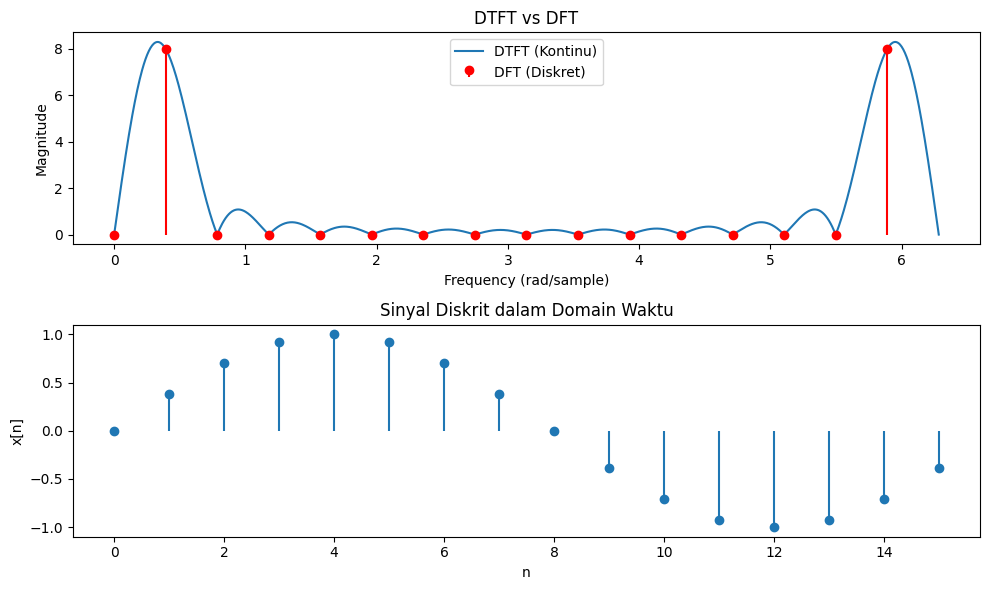

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sinyal diskrit
N = 16
n = np.arange(N)
x = np.sin(2 * np.pi * n / N)  # Sinyal sinusoidal

# DTFT (frekuensi kontinu)
omega = np.linspace(0, 2 * np.pi, 1000)
X_dtft = np.array([np.sum(x * np.exp(-1j * w * n)) for w in omega])

# DFT (frekuensi diskret)
X_dft = np.fft.fft(x)

# Plot hasil
plt.figure(figsize=(10, 6))

# DTFT
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(X_dtft), label='DTFT (Kontinu)')
plt.stem(2 * np.pi * np.arange(N) / N, np.abs(X_dft), linefmt='r-', markerfmt='ro', basefmt=" ", label='DFT (Diskret)')
plt.title('DTFT vs DFT')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.legend()

# Sinyal asli
plt.subplot(2, 1, 2)
plt.stem(n, x, basefmt=" ")
plt.title('Sinyal Diskrit dalam Domain Waktu')
plt.xlabel('n')
plt.ylabel('x[n]')

plt.tight_layout()
plt.show()

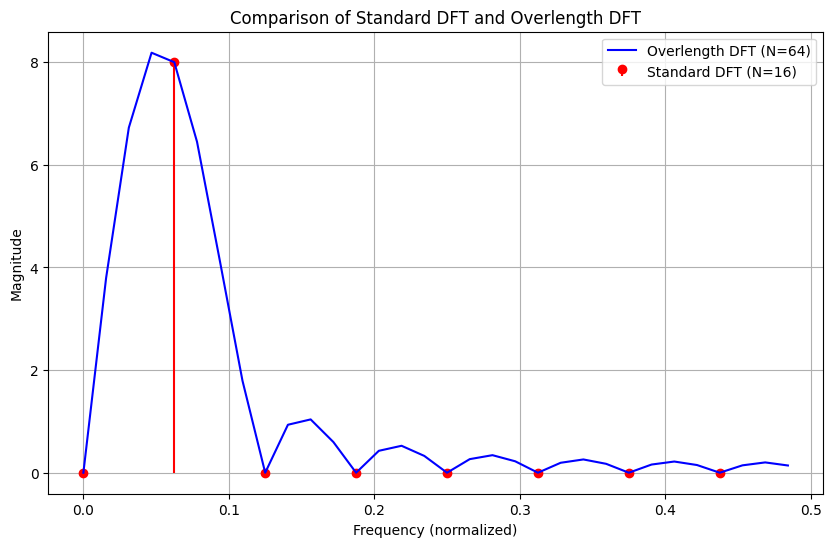

In [4]:

# Original signal
N = 16  # Original signal length
n = np.arange(N)
x = np.sin(2 * np.pi * n / N)  # Sine wave with one period

# Zero-padding
N_padded = 64  # Overlength (more frequency samples)
x_padded = np.pad(x, (0, N_padded - N), 'constant')

# Compute DFTs
X_dft = np.fft.fft(x, n=N)  # Standard DFT
X_dft_padded = np.fft.fft(x_padded, n=N_padded)  # Overlength DFT

# Frequency axes
freq_original = np.fft.fftfreq(N, d=1)[:N // 2]
freq_padded = np.fft.fftfreq(N_padded, d=1)[:N_padded // 2]

# Plot results
plt.figure(figsize=(10, 6))

# Original DFT
plt.stem(freq_original, np.abs(X_dft[:N // 2]), linefmt='r-', markerfmt='ro', basefmt=" ", label='Standard DFT (N=16)')

# Overlength DFT
plt.plot(freq_padded, np.abs(X_dft_padded[:N_padded // 2]), 'b-', label='Overlength DFT (N=64)')

plt.title('Comparison of Standard DFT and Overlength DFT')
plt.xlabel('Frequency (normalized)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.show()

In [5]:
from sympy import symbols, exp, I, Sum, simplify

# Define symbolic variables
n, w = symbols('n w', real=True)

# Define the signal x[n]
x = [1, 2, 3]

# DTFT formula
X_w = Sum(x[n] * exp(-I * w * n), (n, 0, len(x) - 1)).doit()

# Simplify the result
X_w = simplify(X_w)

print(f"DTFT of x[n]: {X_w}")

TypeError: list indices must be integers or slices, not Symbol

In [6]:
from sympy import symbols, exp, I, Sum, simplify, Piecewise

# Define symbolic variables
n, w, a = symbols('n w a', real=True)

# Define the signal x[n] = a**n * u[n], where u[n] is the unit step function
x = a**n  # Unit step is implicit for n >= 0

# DTFT formula
X_w = Sum(x * exp(-I * w * n), (n, 0, symbols('oo'))).doit()

# Simplify the result
X_w = simplify(X_w)

print(f"DTFT of x[n]: {X_w}")

DTFT of x[n]: Sum(a**n*exp(-I*n*w), (n, 0, oo))


In [8]:
from sympy import symbols, exp, I, Sum, lambdify

# Define symbolic variables
n, w = symbols('n w', real=True)

# Define the signal x[n]
x = [1, 2, 3]

# Compute the DTFT symbolically
# X_w = Sum(x[n] * exp(-I * w * n), (n, 0, len(x) - 1)).doit()
X_w = Sum(x * exp(-I * w * n), (n, 0, symbols('oo'))).doit()

# Convert symbolic DTFT to a numerical function
X_w_func = lambdify(w, X_w, 'numpy')

# Frequency range for plotting
omega = np.linspace(0, 2 * np.pi, 500)

# Evaluate DTFT magnitude and phase
X_w_magnitude = np.abs(X_w_func(omega))
X_w_phase = np.angle(X_w_func(omega))

# Plot results
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.plot(omega, X_w_magnitude, label="Magnitude")
plt.title("DTFT of x[n] = {1, 2, 3}")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.plot(omega, X_w_phase, label="Phase", color="orange")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

TypeError: can't multiply sequence by non-int of type 'exp'